## Experiment:1

Please enter the coordinates of x1, y1: 100 100
Enter the final coordinates of x2, y2: 200 200


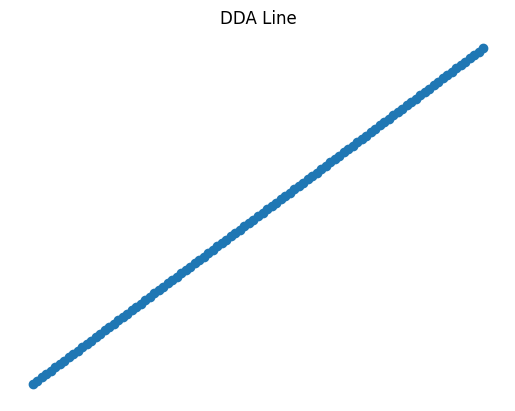

In [ ]:
import matplotlib.pyplot as plt

def DDA(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))
    Xinc = dx / steps
    Yinc = dy / steps

    x, y = x1, y1
    x_points = [x]
    y_points = [y]

    for _ in range(steps):
        x += Xinc
        y += Yinc
        x_points.append(round(x))
        y_points.append(round(y))

    plt.plot(x_points, y_points, marker='o')
    plt.title('DDA Line')
    plt.gca().set_axis_off()
    plt.show()

x1, y1 = map(int, input("Please enter the coordinates of x1, y1: ").split())
x2, y2 = map(int, input("Enter the final coordinates of x2, y2: ").split())
DDA(x1, y1, x2, y2)

## Experiment:2

Enter center (x y): 20 30
Enter radius: 50


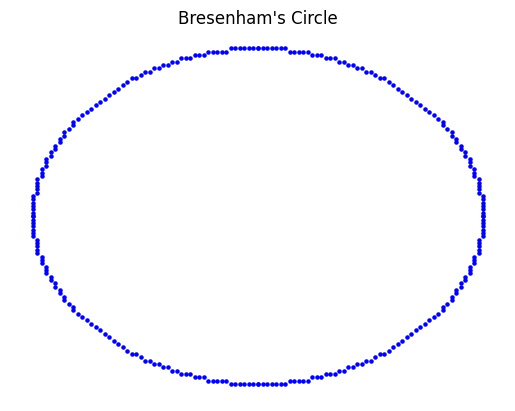

In [ ]:
import matplotlib.pyplot as plt

def bresenham_circle(xc, yc, r):
    x, y, p = 0, r, 3 - 2 * r
    x_pts, y_pts = [], []

    def plot_points(xc, yc, x, y):
        x_pts.extend([xc + x, xc - x, xc + x, xc - x, xc + y, xc - y, xc + y, xc - y])
        y_pts.extend([yc + y, yc + y, yc - y, yc - y, yc + x, yc + x, yc - x, yc - x])

    while x <= y:
        plot_points(xc, yc, x, y)
        x, p = x + 1, p + (4 * x + 6) if p < 0 else p + 4 * (x - y) + 10
        if p >= 0: y -= 1
    return x_pts, y_pts

def plot_circle(xc, yc, r):
    x_pts, y_pts = bresenham_circle(xc, yc, r)
    plt.scatter(x_pts, y_pts, color='blue', s=5)
    plt.title("Bresenham's Circle")
    plt.gca().set_axis_off()
    plt.show()

xc, yc = map(int, input("Enter center (x y): ").split())
r = int(input("Enter radius: "))
plot_circle(xc, yc, r)



## Experiment:3

Enter coordinates of point 1 (x y): 100 20
Enter coordinates of point 2 (x y): 50 20
Enter coordinates of point 3 (x y): 75 40
1. Translation
2. Rotation
3. Scaling
4. Exit
Enter your choice: 2
Enter the rotation angle (in degrees): 100


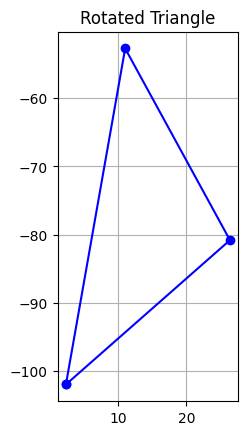

1. Translation
2. Rotation
3. Scaling
4. Exit
Enter your choice: 1
Enter translation in x direction: 50
Enter translation in y direction: 20


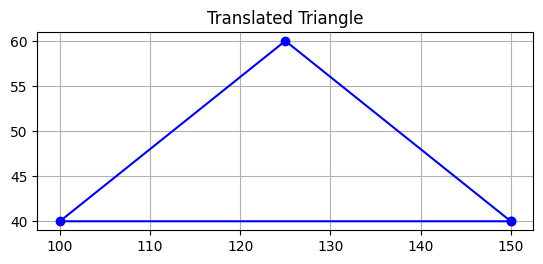

1. Translation
2. Rotation
3. Scaling
4. Exit
Enter your choice: 3
Enter scaling factor in x direction: 20
Enter scaling factor in y direction: 20


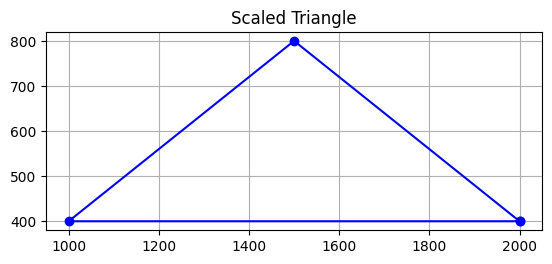

1. Translation
2. Rotation
3. Scaling
4. Exit
Enter your choice: 4
Exiting program.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_triangle(points, title):
    points = np.append(points, [points[0]], axis=0)
    plt.plot(points[:, 0], points[:, 1], marker='o', color='blue')
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0], [0, sy]])
    scaled_points = np.dot(points, scaling_matrix)
    return scaled_points

def translate(points, tx, ty):
    translated_points = points + np.array([tx, ty])
    return translated_points

def rotate(points, angle):
    angle = math.radians(angle)
    rotation_matrix = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
    rotated_points = np.dot(points, rotation_matrix)
    return rotated_points

def main():
    points = []
    for i in range(3):
        x, y = map(float, input(f"Enter coordinates of point {i+1} (x y): ").split())
        points.append([x, y])
    points = np.array(points)

    while True:
        print("1. Translation")
        print("2. Rotation")
        print("3. Scaling")
        print("4. Exit")
        choice = int(input("Enter your choice: "))

        if choice == 1:
            tx = float(input("Enter translation in x direction: "))
            ty = float(input("Enter translation in y direction: "))
            new_points = translate(points, tx, ty)
            plot_triangle(new_points, "Translated Triangle")

        elif choice == 2:
            angle = float(input("Enter the rotation angle (in degrees): "))
            new_points = rotate(points, angle)
            plot_triangle(new_points, "Rotated Triangle")

        elif choice == 3:
            sx = float(input("Enter scaling factor in x direction: "))
            sy = float(input("Enter scaling factor in y direction: "))
            new_points = scale(points, sx, sy)
            plot_triangle(new_points, "Scaled Triangle")

        elif choice == 4:
            print("Exiting program.")
            break

        else:
            print("Invalid choice, please try again.")
main()


## Experiment:4

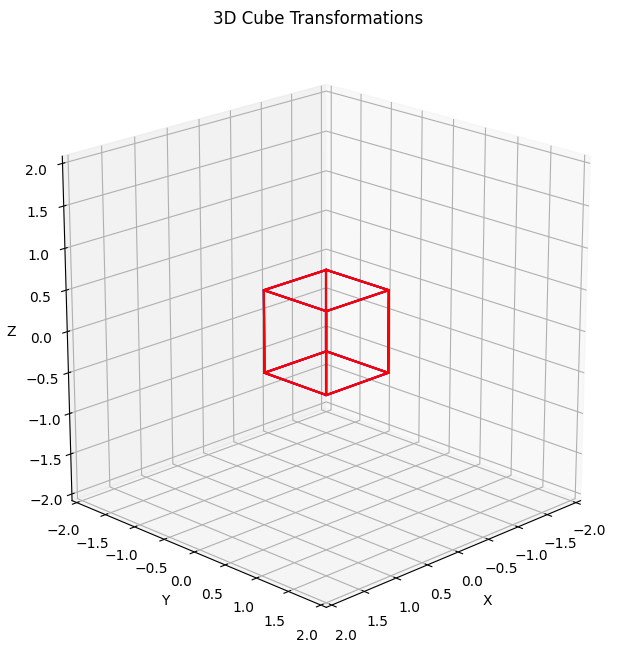


1. Translation
2. Rotation
3. Scaling
4. Exit


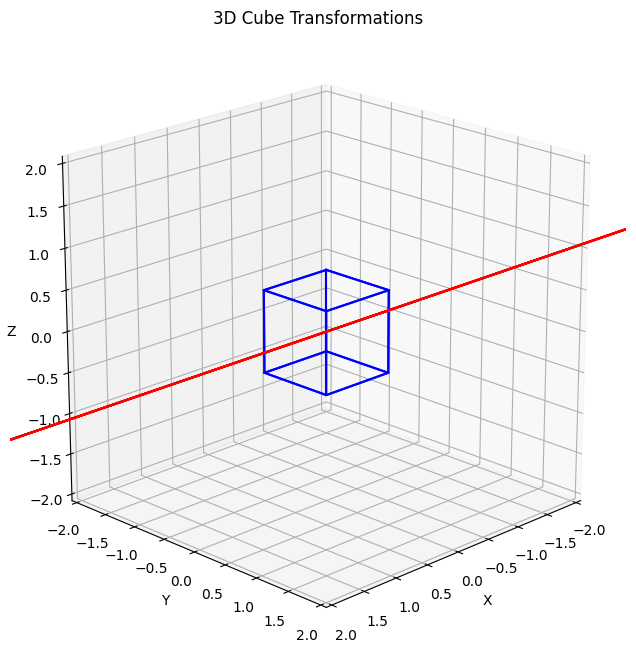


1. Translation
2. Rotation
3. Scaling
4. Exit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_cube(ax, points, color='b'):
    faces = [
        [0, 1, 2, 3], [4, 5, 6, 7], [0, 3, 7, 4],
        [1, 2, 6, 5], [0, 1, 5, 4], [2, 3, 7, 6]
    ]
    for face in faces:
        ax.plot3D(points[face, 0], points[face, 1], points[face, 2], color)
        ax.plot3D([points[face[0], 0], points[face[-1], 0]],
                  [points[face[0], 1], points[face[-1], 1]],
                  [points[face[0], 2], points[face[-1], 2]], color)

def translate(points, tx, ty, tz):
    return points + [tx, ty, tz]

def rotate(points, angle, axis):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    if axis == 'x':
        rotation_matrix = np.array([[1, 0, 0], [0, c, -s], [0, s, c]])
    elif axis == 'y':
        rotation_matrix = np.array([[c, 0, s], [0, 1, 0], [-s, 0, c]])
    else:
        rotation_matrix = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])
    return np.dot(points, rotation_matrix.T)

def scale(points, sx, sy, sz):
    return points * [sx, sy, sz]

def update_plot(original, transformed):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    plot_cube(ax, original, 'b')
    plot_cube(ax, transformed, 'r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.set_box_aspect((1, 1, 1))
    ax.view_init(elev=20, azim=45)
    plt.title("3D Cube Transformations")
    plt.show()

cube = np.array([
    [-0.5, -0.5, -0.5], [0.5, -0.5, -0.5], [0.5, 0.5, -0.5], [-0.5, 0.5, -0.5],
    [-0.5, -0.5, 0.5], [0.5, -0.5, 0.5], [0.5, 0.5, 0.5], [-0.5, 0.5, 0.5]
])
transformed_cube = cube.copy()

while True:
    update_plot(cube, transformed_cube)

    print("\n1. Translation\n2. Rotation\n3. Scaling\n4. Exit")
    choice = input("Enter your choice (1-4): ")

    if choice == '1':
        tx = float(input("Enter translation in x: "))
        ty = float(input("Enter translation in y: "))
        tz = float(input("Enter translation in z: "))
        transformed_cube = translate(transformed_cube, tx, ty, tz)
    elif choice == '2':
        angle = float(input("Enter rotation angle in degrees: "))
        axis = input("Enter rotation axis (x/y/z): ").lower()
        transformed_cube = rotate(transformed_cube, angle, axis)
    elif choice == '3':
        sx = float(input("Enter scaling factor for x: "))
        sy = float(input("Enter scaling factor for y: "))
        sz = float(input("Enter scaling factor for z: "))
        transformed_cube = scale(transformed_cube, sx, sy, sz)
    elif choice == '4':
        break
    else:
        print("Invalid choice. Please try again.")

print("Program ended.")

## Experiment:5

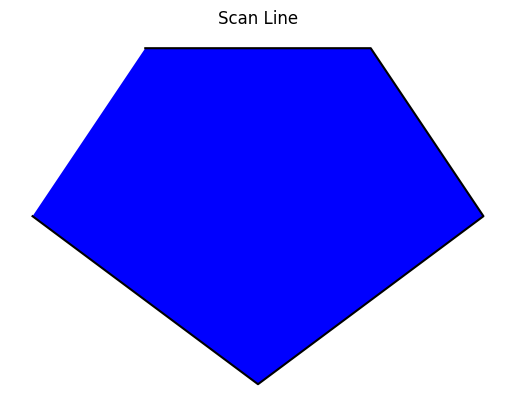

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vertices = np.array([[100, 150], [200, 50], [300, 150], [250, 250], [150, 250]])

def plot_polygon(vertices):
    plt.fill(vertices[:, 0], vertices[:, 1], 'blue')
    plt.plot(vertices[:, 0], vertices[:, 1], 'black')
    plt.title("Scan Line")
    plt.gca().set_axis_off()
    plt.show()
plot_polygon(vertices)


# Experiment:6

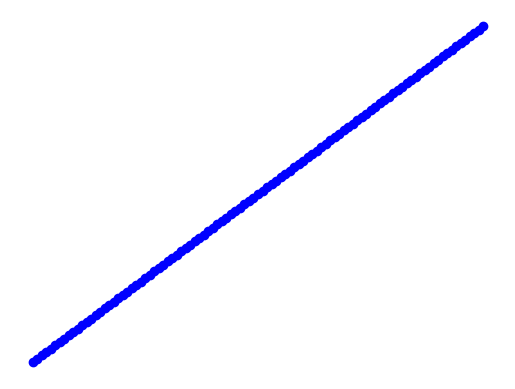

In [ ]:
import matplotlib.pyplot as plt

def bresenham_line(x1, y1, x2, y2):
    x, y = x1, y1
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x2 > x1 else -1
    sy = 1 if y2 > y1 else -1
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            plt.plot(x, y, 'bo')
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            plt.plot(x, y, 'bo')
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    plt.title("Bresenham's Line")
    plt.gca().set_axis_off()
    plt.plot(x, y, 'bo')
x1, y1 = 100, 100
x2, y2 = 200, 200

bresenham_line(x1, y1, x2, y2)
plt.show()


# Experiment:7

In [ ]:
!pip install ColabTurtle

  Preparing metadata (setup.py) ... done
  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7642 sha256=b75168c684f6972bca59843aede5ee32a5a4865fc25b23e3b42e3ee0de814088
  Stored in directory: /root/.cache/pip/wheels/5b/86/e8/54f5c8c853606e3a3060bb2e60363cbed632374a12e0f33ffc
Successfully built ColabTurtle


In [ ]:
import ColabTurtle.Turtle as turtle

def hilbert(level, angle, step):
    if level == 0:
        return
    turtle.right(angle)
    hilbert(level - 1, -angle, step)
    turtle.forward(step)
    turtle.left(angle)
    hilbert(level - 1, angle, step)
    turtle.forward(step)
    hilbert(level - 1, angle, step)
    turtle.left(angle)
    turtle.forward(step)
    hilbert(level - 1, -angle, step)
    turtle.right(angle)
turtle.initializeTurtle()
turtle.speed(10)
turtle.penup()
level = 5
size = 400
step = size / (2**level - 1)

turtle.goto(50, 450)
turtle.pendown()

hilbert(level, 90, step)


# Experiment:8

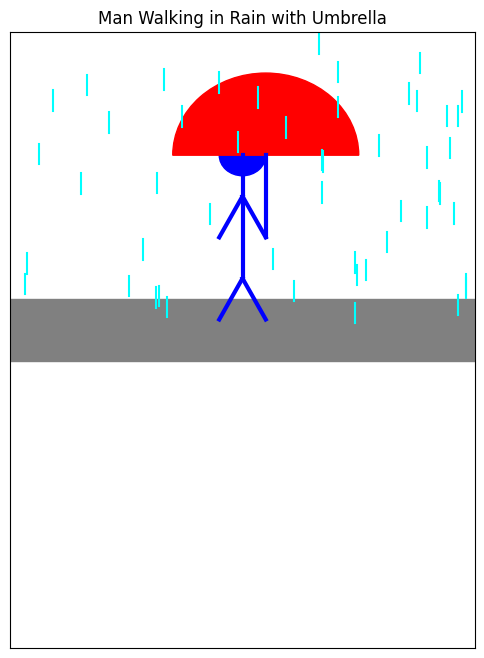

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge, Rectangle

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 15)
road = Rectangle((0, 7), 10, 1.5, color='gray')
ax.add_patch(road)

head = plt.Circle((5, 12), 0.5, color='blue')
ax.add_patch(head)
plt.plot([5, 5], [9, 12], color='blue', lw=3)
plt.plot([5, 4.5], [11, 10], color='blue', lw=3)
plt.plot([5, 5.5], [11, 10], color='blue', lw=3)
plt.plot([5, 4.5], [9, 8], color='blue', lw=3)
plt.plot([5, 5.5], [9, 8], color='blue', lw=3)

umbrella = Wedge((5.5, 12), 2, 0, 180, color='red')
ax.add_patch(umbrella)

plt.plot([5.5, 5.5], [12, 10], color='blue', lw=3)

def draw_rain():
    for _ in range(50):
        x = np.random.uniform(0, 10)
        y = np.random.uniform(8, 15)
        plt.plot([x, x], [y, y-0.5], color='cyan')

draw_rain()

ax.set_title('Man Walking in Rain with Umbrella')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


# Experiment:9

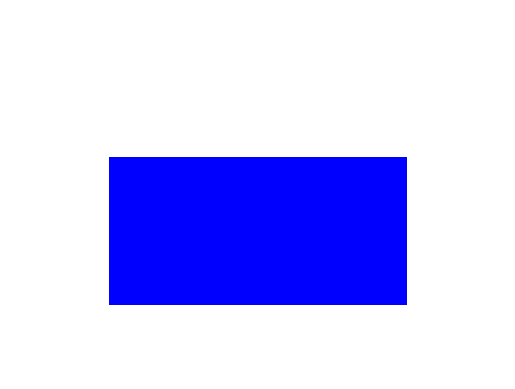

In [ ]:
import matplotlib.pyplot as plt

rectangle = plt.Rectangle((0.2, 0.2), 0.6, 0.4, fc='blue')

fig, ax = plt.subplots()
ax.add_patch(rectangle)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.gca().set_axis_off()
plt.show()


# Experiment:10

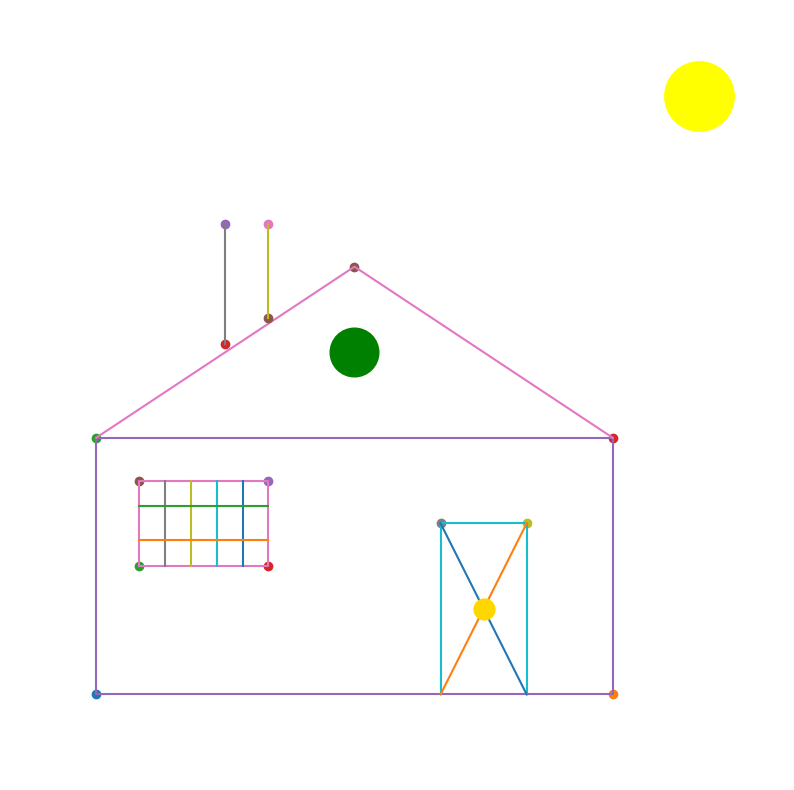

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.plot(2, 2,  marker = "o")
plt.plot(8, 2,  marker = "o")
plt.plot(2, 5,  marker = "o")
plt.plot(8, 5,  marker = "o")
plt.plot([2, 8, 8, 2, 2], [2, 2, 5, 5, 2])
plt.plot(5, 7,  marker = "o")
plt.plot([2, 5, 8], [5, 7, 5])
plt.plot(5, 6, marker = "o", markersize = 35, color = 'green')
plt.plot(6, 4,  marker = "o")
plt.plot(7, 4,  marker = "o")
plt.plot([6, 6, 7, 7], [2, 4, 4, 2])
plt.plot([6, 7], [4, 2])
plt.plot([7, 6], [4, 2])
plt.plot(6.5, 3,  marker = "o", markersize = 15, color = 'gold')
plt.plot(2.5, 3.5, marker = 'o')
plt.plot(4, 3.5, marker = 'o')
plt.plot(4, 4.5, marker = 'o')
plt.plot(2.5, 4.5, marker = 'o')
plt.plot([2.5, 4, 4, 2.5, 2.5], [3.5, 3.5, 4.5, 4.5, 3.5])
plt.plot([2.8, 2.8], [3.5, 4.5])
plt.plot([3.1, 3.1], [3.5, 4.5])
plt.plot([3.4, 3.4], [3.5, 4.5])
plt.plot([3.7, 3.7], [3.5, 4.5])
plt.plot([2.5, 4], [3.8, 3.8])
plt.plot([2.5, 4], [4.2, 4.2])
plt.plot(3.5, 6.1, marker = 'o')
plt.plot(3.5, 7.5, marker = 'o')
plt.plot(4, 6.4, marker = 'o')
plt.plot(4, 7.5, marker = 'o')
plt.plot([3.5, 3.5], [6.1, 7.5])
plt.plot([4, 4], [6.4, 7.5])
plt.plot(9, 9, marker = 'o', markersize = 50, color='yellow')
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.gca().set_axis_off()
plt.show()

# Experiment:11

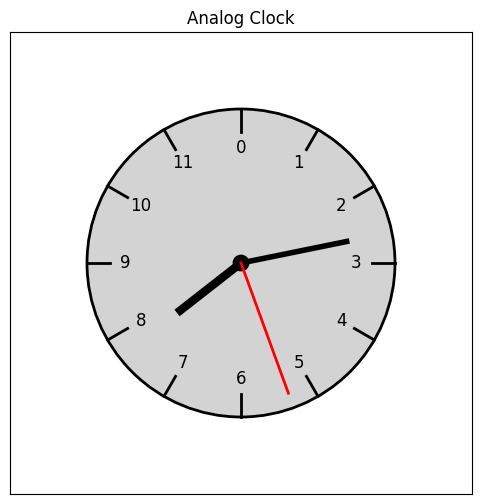

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

def draw_clock():
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'aspect': 'equal'})
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    clock_face = plt.Circle((0, 0), 1, color='lightgray', ec='black', lw=2)
    ax.add_artist(clock_face)

    for i in range(12):
        angle = np.deg2rad(30 * i - 90)
        x_outer = np.cos(angle)
        y_outer = np.sin(angle)
        x_inner = 0.85 * np.cos(angle)
        y_inner = 0.85 * np.sin(angle)

        plt.plot([x_inner, x_outer], [y_inner, y_outer], color='black', lw=2)
        plt.text(0.75 * np.cos(angle), -0.75 * np.sin(angle), str(i + 0),
                 horizontalalignment='center', verticalalignment='center', fontsize=12)

    now = datetime.datetime.now()
    hour = now.hour % 12 + now.minute / 60
    minute = now.minute + now.second / 60
    second = now.second
    hour_angle = np.deg2rad(30 * hour - 90)
    plt.plot([0, 0.5 * np.cos(hour_angle)], [0, 0.5 * np.sin(hour_angle)], color='black', lw=6)
    minute_angle = np.deg2rad(6 * minute - 90)
    plt.plot([0, 0.7 * np.cos(minute_angle)], [0, 0.7 * np.sin(minute_angle)], color='black', lw=4)
    second_angle = np.deg2rad(6 * second - 40)
    plt.plot([0, 0.9 * np.cos(second_angle)], [0, 0.9 * np.sin(second_angle)], color='red', lw=2)

    center_circle = plt.Circle((0, 0), 0.05, color='black')
    ax.add_artist(center_circle)

    ax.set_xticks([])
    ax.set_yticks([])
    plt.title("Analog Clock")
    plt.show()

draw_clock()


# Experiment:12

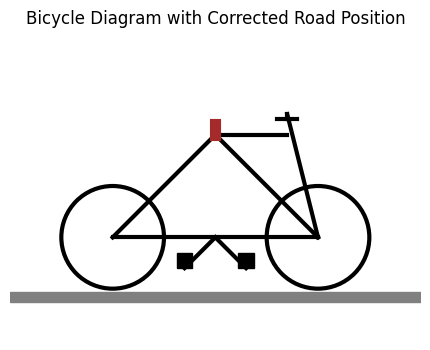

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_wheel(ax, center, radius):
    circle = plt.Circle(center, radius, color='black', fill=False, linewidth=3)
    ax.add_artist(circle)

def draw_frame(ax):
    back_wheel_center = (-1, 0)
    front_wheel_center = (1, 0)
    seat_position = (0, 1)
    handlebar_position = (0.7, 1.2)
    pedal_position = (0, 0)
    draw_wheel(ax, back_wheel_center, 0.5)
    draw_wheel(ax, front_wheel_center, 0.5)

    ax.plot([-1, 0], [0, 1], color='black', linewidth=3)
    ax.plot([0, 1], [1, 0], color='black', linewidth=3)
    ax.plot([-1, 1], [0, 0], color='black', linewidth=3)
    ax.plot([0, 0.7], [1, 1], color='black', linewidth=3)
    ax.plot([0.7, 1], [1.2, 0], color='black', linewidth=3)
    ax.plot([0, 0], [1, 1.1], color='brown', linewidth=8)
    ax.plot([0.7, 0.7], [1.2, 1.15], color='black', linewidth=3)
    ax.plot([0.6, 0.8], [1.15, 1.15], color='black', linewidth=3)
    pedal_arm_length = 0.3
    ax.plot([0, -pedal_arm_length], [0, -pedal_arm_length], color='black', linewidth=3)
    ax.plot([0, pedal_arm_length], [0, -pedal_arm_length], color='black', linewidth=3)
    pedal_width = 0.15
    ax.add_patch(plt.Rectangle((-pedal_arm_length - pedal_width/2, -pedal_arm_length), pedal_width, pedal_width, angle=0, color='black'))
    ax.add_patch(plt.Rectangle((pedal_arm_length - pedal_width/2, -pedal_arm_length), pedal_width, pedal_width, angle=0, color='black'))

def draw_road(ax):
    ax.add_patch(plt.Rectangle((-2, -0.63), 4, 0.1, color='gray'))

fig, ax = plt.subplots(figsize=(8, 4))
draw_frame(ax)
draw_road(ax)

ax.set_xlim(-2, 2)
ax.set_ylim(-1, 2)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Bicycle Diagram with Corrected Road Position")
plt.show()
